In [315]:
import matplotlib.pyplot as plt
import matplotlib as mp
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import openpyxl as op

In [316]:
mp.rc('font', family='Malgun Gothic')
mp.rc('axes', unicode_minus=False)


In [317]:
data = pd.read_csv('대학교_학생수_시도_시_군_구__20240129171635.csv', 
                    encoding='utf-8-sig', header=[0,1], index_col=0)

In [318]:
# 첫행 삭제
data = data.iloc[1:]
data

행정구역별                2023                                
행정구역별   대학교 재학생수(A+B+C+D)   일반대(A)   전문대(B) 교육대(C) 산업대(D)
서울특별시             506,612  452,370   52,745  1,497      -
부산광역시             198,221  165,461   31,261  1,499      -
대구광역시             101,779   56,585   43,592  1,602      -
인천광역시              75,103   51,170   19,440  1,283  3,210
광주광역시              94,217   75,438   17,444  1,335      -
대전광역시             120,612  102,950   17,662      -      -
울산광역시              29,318   18,840   10,478      -      -
세종특별자치시            21,022   16,949    4,073      -      -
경기도               439,322  275,249  162,780  1,293      -
강원특별자치도           100,690   86,457   12,931  1,302      -
충청북도              101,131   85,626   14,317  1,188      -
충청남도              164,660  141,916   17,243  1,419  4,082
전라북도              101,637   74,444   19,605  1,152  6,436
전라남도               56,910   38,247   18,663      -      -
경상북도              165,256  131,644   33,612      -      -
경상남도               92,121   68,188   22,646  1,287      -
제주특별자치도            24,517   13,840   10,677      -      -

In [319]:
# 컬럼명 
data.columns = data.columns.droplevel(0)

In [320]:
# 2번 컬럼 이후 삭제
# 컬럼명 변경
data = data.rename(columns={'대학교 재학생수(A+B+C+D)': '대학생수(명)'})
data

행정구역별,대학생수(명),일반대(A),전문대(B),교육대(C),산업대(D)
서울특별시,"506,612","452,370","52,745","1,497",-
부산광역시,"198,221","165,461","31,261","1,499",-
대구광역시,"101,779","56,585","43,592","1,602",-
인천광역시,"75,103","51,170","19,440","1,283","3,210"
광주광역시,"94,217","75,438","17,444","1,335",-
대전광역시,"120,612","102,950","17,662",-,-
울산광역시,"29,318","18,840","10,478",-,-
세종특별자치시,"21,022","16,949","4,073",-,-
경기도,"439,322","275,249","162,780","1,293",-
강원특별자치도,"100,690","86,457","12,931","1,302",-


In [321]:
data = data.drop(data.columns[1:], axis=1)
# data
data['대학생수(명)'] = data['대학생수(명)'].str.replace(',','')
data = data.astype('int64')
data=data.sort_values(by='대학생수(명)', ascending=False)
data

행정구역별,대학생수(명)
서울특별시,506612
경기도,439322
부산광역시,198221
경상북도,165256
충청남도,164660
대전광역시,120612
대구광역시,101779
전라북도,101637
충청북도,101131
강원특별자치도,100690


In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울특별시 to 세종특별자치시
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   대학생수(명)  17 non-null     int64
dtypes: int64(1)
memory usage: 272.0+ bytes


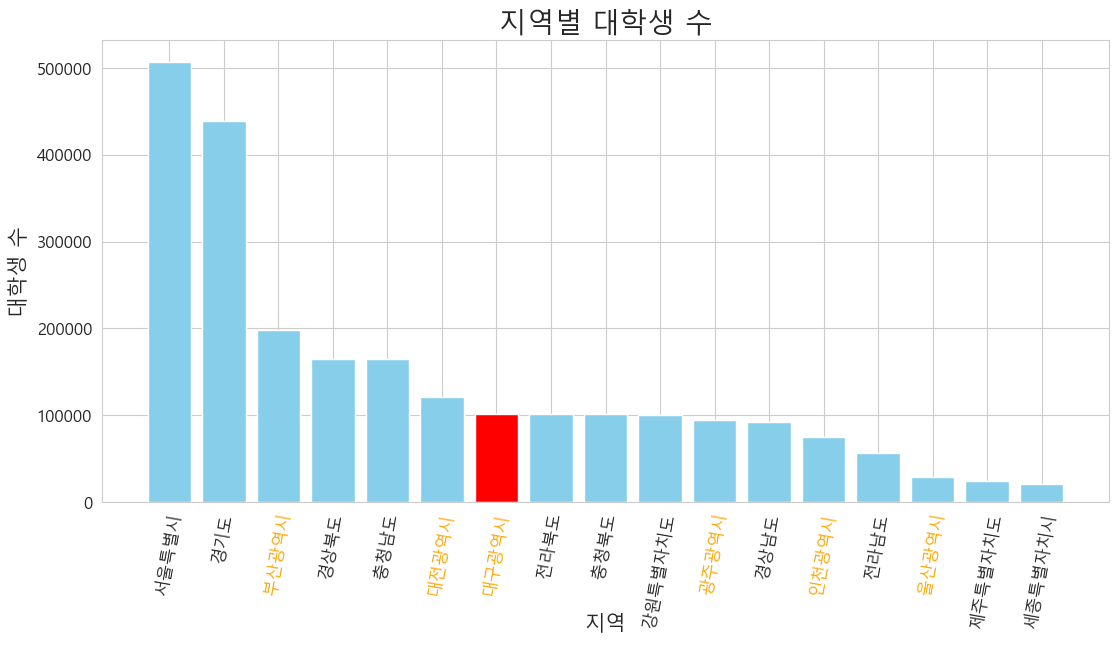

In [323]:
# data를 토대로 행정구역별 x축 학생수 y축 그래프 만들기
fig, ax = plt.subplots(figsize=(13,6))
plt.bar(data.index, data['대학생수(명)'], color='skyblue')
plt.yticks(fontsize=12, )
plt.xticks(fontsize=12, rotation=80)
plt.bar('대구광역시',data.loc['대구광역시'], color='red')
# plt.axhline(data.loc['대구광역시'], color='red', linestyle='--')
plt.title('지역별 대학생 수', fontsize=20)
plt.xlabel('지역', fontsize=15, va='bottom')
plt.ylabel('대학생 수', fontsize=15)

plt.xticks(data.index, ['서울특별시', '경기도' ,'부산광역시' ,'경상북도', '충청남도', '대전광역시', '대구광역시',' 전라북도', '충청북도','강원특별자치도', '광주광역시' ,'경상남도' ,'인천광역시', '전라남도','울산광역시','제주특별자치도' ,'세종특별자치시'])
ax = plt.gca()
for label in ax.get_xticklabels():
    if '광역시' in label.get_text():
        label.set_color('orange')
# 특정 조건에 따라 색상 변경
# ax = plt.gca()  # 현재 축 가져오기
# for label in ax.get_xticklabels():
#     if '광역시' in data.index:
#         label.set_color('orange')
# plt.tick_params(axis='x' if '광역시' in axis, labelcolor='orange')
plt.show()

In [333]:
fs = pd.read_csv('컴퓨터 메이트 재무제표.csv', encoding='utf-8-sig')
#(단위 : 천원)

In [334]:
fs
fs.set_index('계정명',inplace=True)

In [339]:
new_order=['2020.12.31', '2021.12.31', '2022.12.31']
fs = fs[new_order]
fs
#(단위 : 천원)

,2020.12.31,2021.12.31,2022.12.31
계정명,,,
유동자산,"3,968,269","5,073,227","5,343,506"
비 유동자산,"5,600,611","5,452,079","5,219,465"
자산 합계,"9,568,880","10,525,305","10,562,971"
유동부채,"754,672","1,158,766","1,719,636"
비 유동부채,"2,400,000","2,260,000","980,000"
채무 합계,"3,154,672","3,418,766","2,699,636"
자본금,"100,000","100,000","100,000"
자본금 합계,"6,414,208","7,106,540","7,863,335"
매출액,"10,185,817","9,161,654","8,620,009"


In [341]:
for i in fs.columns:
    fs[i] = fs[i].str.replace(',','')
fs = fs.astype(float)
fs

ValueError: could not convert string to float: '0.46%'

In [340]:



fs = fs.str.replace(',','')

AttributeError: 'DataFrame' object has no attribute 'str'

In [338]:
fs = fs.astype(float)

ValueError: could not convert string to float: '3,968,269'

In [342]:
mate_m_ratio = [5.01, 4.90,	7.74,]
industry_avg= [9.43]

<BarContainer object of 1 artists>

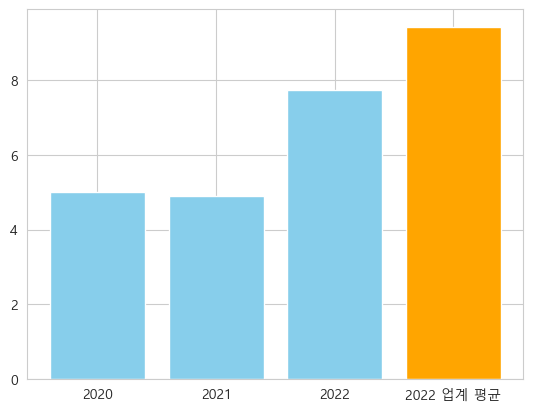

In [365]:

plt.bar(x=['2020', '2021', '2022'], height=[5.01, 4.90, 7.74], color='skyblue')

plt.bar(x=['2022 업계 평균'], height=[9.43], color='orange')